<a href="https://colab.research.google.com/github/Rithika-04/mini_projects/blob/main/Sales_Data_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
try:
  data=[]
  with open("sales.csv","r") as f:
    next(f)
    for i in f:
      parts=i.strip().split(',')
      if len(parts)==4:
        [date,product,quantity,price]=parts
        data.append([date,product,int(quantity),int(price)])
  print(data)
#       data.append(new_list)
#     print(data)
except FileNotFoundError:
  print("file not found")
except Exception as e:
  print(f"unexpected error: {e}")

[['01-01-2024', 'pen', 10, 5], ['01-01-2024', 'Notebook', 10, 5], ['02-01-2024', 'pen', 7, 5], ['02-01-2024', 'Eraser', 12, 2], ['03-01-2024', 'Notebook', 8, 20], ['03-01-2024', 'pen', 15, 5]]


In [30]:
def total_quantity_per_product(data):
  total_sales={}
  for row in data:
    product=row[1].capitalize()
    quantity=row[2]
    price=row[3]
    if product not in total_sales:
      total_sales[product]={'quantity':0,'revenue':0}
    total_sales[product]['quantity']+=quantity
    total_sales[product]['revenue']+=price *quantity
  for product,stats in total_sales.items():
    print(f"{product}:Quantity={stats['quantity']},Revenue:{stats['revenue']}")
total_quantity_per_product(data)



Pen:Quantity=32,Revenue:160
Notebook:Quantity=18,Revenue:210
Eraser:Quantity=12,Revenue:24


In [31]:
def total_revenue_per_day(data,printoutput=True):
  day_revenue={}
  for row in data:
    date=row[0]
    quantity=row[2]
    price=row[3]
    if date not in day_revenue:
      day_revenue[date] =0
    day_revenue[date] += quantity*price
  if printoutput:
    for date,revenue in day_revenue.items():
        print(f"{date}:{revenue}")
  return day_revenue
total_revenue_per_day(data)

01-01-2024:100
02-01-2024:59
03-01-2024:235


{'01-01-2024': 100, '02-01-2024': 59, '03-01-2024': 235}

In [33]:
def total_summary():
  print("Product-Wise Summary".center(40,"="))
  total_quantity_per_product(data)
  print("\n")
  print("Date-Wise Revenue Summary".center(40,"="))
  total_revenue_per_day(data,printoutput=True)
total_summary()

==========Product-Wise Summary==========
Pen:Quantity=32,Revenue:160
Notebook:Quantity=18,Revenue:210
Eraser:Quantity=12,Revenue:24


=======Date-Wise Revenue Summary========
01-01-2024:100
02-01-2024:59
03-01-2024:235


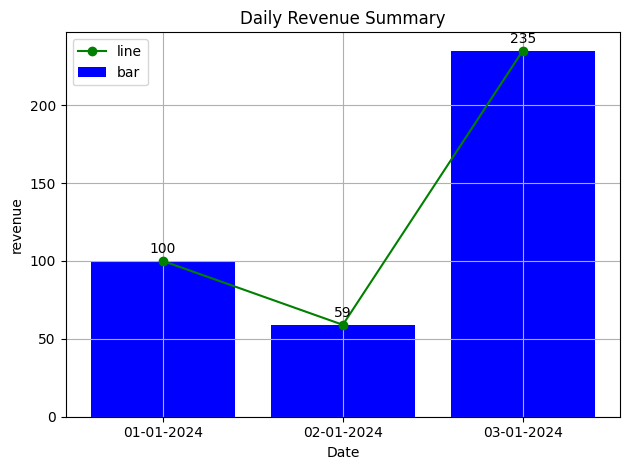

In [52]:
import matplotlib.pyplot as plt
def plot_daily_revenue():
  daily_revenue=total_revenue_per_day(data,printoutput=False)
  date_lis=list(daily_revenue.keys())
  revenue_lis=list(daily_revenue.values())
  #plot
  plt.plot(date_lis,revenue_lis,marker="o",color='green',label='line')
  plt.bar(date_lis,revenue_lis,color='blue',label='bar')
  plt.title("Daily Revenue Summary")
  plt.xlabel("Date")
  plt.ylabel("revenue")
  for i,value in enumerate(revenue_lis):
    plt.text(i,value + 5,str(value),ha='center')
  plt.grid(True)
  plt.tight_layout()
  plt.legend()
  plt.show()
plot_daily_revenue()